# Cats And Dogs Image Classification

we are building this model with neural networks. Here i am using the keras to do classification. keras is the
neural network library which work on top of the Tensorflow or we can say tf as the backend for this library.

DATA: we have downloaded our data from the kaggle website you can download it from 
      here : https://www.kaggle.com/c/dogs-vs-cats/data

Here we use simple sequential neural networks which allow us to to use neural nets only layer by layers
it does not allow you any complex neural nets such as RNN and LSTM. These neural networks are
form simply layers by layes and each layers have their own weights. imput of one layers feeded to another. 
The sum of the product of current weights and input from previous layers form the activations to next layer.

finally in last layer we have flatten these hiddden layers and the last layer is the sigmoid layers which outputs as the
Dog or Cat. SIGMOID is generally used for the classification purpose only.

The ADAM OPTIMIZER algorithm which  is an extension to stochastic gradient descent.It is useful to give a global
optimal solution So we have used it here for optimization.

ACTIVATION FUNCTION used is the he Rectified Linear Unit (ReLU) In a neural network,the activation function is responsible
for transforming the imputssummed weighted input from the node into the activation of the node or output for that input. 

To  minimize the loss of the weights and activations we have used the binary_crossentrpy function here.A metric is 
function that is used to judge the performance of your model. 
                

In [5]:
#IMPORTING THE REQUIRED LIBRARIES FIRST

import tensorflow as tf
import keras
# Building the CNN

# Importing the Keras libraries and packages'''
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
Here i have added various layers. About these layers i discussed above .
convolution function takes three arguments the first is about the number of output i. 32 .
the filter used here is of size 3X3. the input size of the image is 64x64 pixel the rgb channel used is of size three. Hence the input size becomes as 64x64x3.

The maxpooling size is 2x2. i.e from ech matrix of image we wll filter the matrix according to feature with max occurance.
the number of layers could be added according to the combination which gives you the best accuracy.



In [6]:


# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# # Adding a second convolutional layer
# classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size = (2, 2)))

# # Adding a third convolutional layer
# classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a fourth convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fitting the CNN to the images




W0722 12:41:48.491290 23772 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  import sys
W0722 12:41:48.539301 23772 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 12:41:48.543303 23772 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0722 12:41:48.575310 23772 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-

# Data Augmentations

This is done so to increase the diversity of data so as to give more insights of the images to the machine algorithms.
Here we use shearing , zooming the images and making the horizontal flip of images technique to train our neural nets.

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Loading Data

Here i have loaded my data from my local file the data is freely available to kagggle site  there are almost 25000 
images of cates and dogs. out of 25000 images we can break it as 15000 for ur training and 10000 as our test datasets.
i have used only 8000 images for train and 2000 for test purpose.

we will break our images as 64x64 pixels images. and batch_size is the number of images per epoch to be feed to our algo.

In [8]:

import os 
# os.getcwd("C:\\Users\\Vikas Bhardwaj\\Desktop\\DATA SCIENCE\\Datasets\\Datasets\\cnn_imgs_dataset")
os.chdir("C:\\Users\\Vikas Bhardwaj\\Desktop\\DATA SCIENCE\\Datasets\\Datasets\\cnn_imgs_dataset")


training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')




Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Training our data

Here we have fitted our data to the neural networks.Classifier is the instance of the sequential classifier which
is the simplest neural network  which form the layers of nearons.
Here we include 100 images per epochs and the total epochs will be 55 validation data is nothing but our test set
which consist of 2000 images in our case.

In [29]:
# # this will take long time
# classifier.fit_generator(training_set,
#                          samples_per_epoch = 100,#samples_per_epoch = 8000,
#                          nb_epoch = 55, # nb_epoch = 25,
#                          validation_data = test_set,
#                          nb_val_samples = 200)#nb_val_samples = 2000)

classifier.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 10, # nb_epoch = 25,
                         validation_data = test_set,
                         nb_val_samples = 2000)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=250, epochs=10, validation_steps=2000)`
  if sys.path[0] == '':


Epoch 1/10
250/250 [==============================] - 213s 852ms/step - loss: 0.4805 - acc: 0.7688 - val_loss: 0.4743 - val_acc: 0.7737
Epoch 2/10
250/250 [==============================] - 207s 828ms/step - loss: 0.4717 - acc: 0.7726 - val_loss: 0.4777 - val_acc: 0.7749
Epoch 3/10
250/250 [==============================] - 210s 840ms/step - loss: 0.4567 - acc: 0.7845 - val_loss: 0.4830 - val_acc: 0.7813
Epoch 4/10
250/250 [==============================] - 209s 838ms/step - loss: 0.4397 - acc: 0.7923 - val_loss: 0.4563 - val_acc: 0.7917
Epoch 5/10
250/250 [==============================] - 212s 849ms/step - loss: 0.4201 - acc: 0.8051 - val_loss: 0.4610 - val_acc: 0.7845
Epoch 6/10
250/250 [==============================] - 212s 848ms/step - loss: 0.4088 - acc: 0.8106 - val_loss: 0.4576 - val_acc: 0.7934
Epoch 7/10
250/250 [==============================] - 208s 831ms/step - loss: 0.3982 - acc: 0.8183 - val_loss: 0.4755 - val_acc: 0.7868
Epoch 8/10
250/250 [============================

In [40]:
#The accuracy of our model is approx 84% which is quit GOOD.

# Loading our single TEST IMAGE  to check if our model gives correct classification or not ?

Firstly convert the image to a given pixel size i.e 64x64 as our train images are.

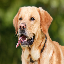

In [9]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
# This is test img
# first arg is the path
# img is 64x64 dims this is what v hv used in training so wee need to use exactly the same dims
# here also

test_image

# Converting images to Arrays
Converting our test image into  an array becouse machine can understand arrays not images 
REmenber be have converted our train images also to arrays !!

In [10]:
test_image = image.img_to_array(test_image)
# Also in our first layer below it is a 3D array
# Step 1 - Convolution
# classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
# this will convert from a 3D img to 3D array
test_image # shld gv us (64,64,3)



array([[[ 54.,  58.,   7.],
        [ 58.,  63.,   9.],
        [ 64.,  67.,  10.],
        ...,
        [136., 144.,  71.],
        [140., 150.,  77.],
        [139., 149.,  78.]],

       [[ 48.,  54.,   6.],
        [ 51.,  58.,   7.],
        [ 58.,  63.,   9.],
        ...,
        [129., 137.,  64.],
        [139., 149.,  78.],
        [141., 151.,  80.]],

       [[ 48.,  56.,   7.],
        [ 48.,  56.,   7.],
        [ 54.,  61.,  10.],
        ...,
        [123., 130.,  63.],
        [136., 145.,  80.],
        [140., 149.,  82.]],

       ...,

       [[ 46.,  55.,  12.],
        [ 42.,  50.,   9.],
        [ 38.,  49.,   9.],
        ...,
        [239., 205., 170.],
        [235., 209., 186.],
        [229., 202., 173.]],

       [[ 50.,  57.,  15.],
        [ 42.,  50.,   9.],
        [ 44.,  52.,  11.],
        ...,
        [234., 200., 162.],
        [236., 206., 178.],
        [234., 203., 174.]],

       [[ 53.,  59.,  13.],
        [ 43.,  51.,  10.],
        [ 49.,  

Adjusting the dimension of the image by expanding it'

In [11]:
test_image = np.expand_dims(test_image, axis = 0)
# axis specifies the position of indx of the dimnsn v r addng
# v need to add the dim in the first position
test_image # now it shld show (1,64,64,3)


array([[[[ 54.,  58.,   7.],
         [ 58.,  63.,   9.],
         [ 64.,  67.,  10.],
         ...,
         [136., 144.,  71.],
         [140., 150.,  77.],
         [139., 149.,  78.]],

        [[ 48.,  54.,   6.],
         [ 51.,  58.,   7.],
         [ 58.,  63.,   9.],
         ...,
         [129., 137.,  64.],
         [139., 149.,  78.],
         [141., 151.,  80.]],

        [[ 48.,  56.,   7.],
         [ 48.,  56.,   7.],
         [ 54.,  61.,  10.],
         ...,
         [123., 130.,  63.],
         [136., 145.,  80.],
         [140., 149.,  82.]],

        ...,

        [[ 46.,  55.,  12.],
         [ 42.,  50.,   9.],
         [ 38.,  49.,   9.],
         ...,
         [239., 205., 170.],
         [235., 209., 186.],
         [229., 202., 173.]],

        [[ 50.,  57.,  15.],
         [ 42.,  50.,   9.],
         [ 44.,  52.,  11.],
         ...,
         [234., 200., 162.],
         [236., 206., 178.],
         [234., 203., 174.]],

        [[ 53.,  59.,  13.],
       

# Dogs:1 Cats:0


In [12]:
result = classifier.predict(test_image)
# v r trying to predict
result # gv us 1


# In[ ]:

print(training_set.class_indices)

if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'



W0722 12:42:18.128570 23772 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:2741: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



{'cats': 0, 'dogs': 1}


# Predicting on test image

 i am predicting a here on different image which gives us the correct result..
 As we have given the image of a cat and it is predicting the same.And  the prediction of 
 our model is correct i should be happy to make such a model (LOL)

In [13]:
#import numpy as np
#from keras.preprocessing import image
test_image = image.load_img('single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)


dog
